### 🧪 Mini Project #1:
Create a script that fetches a ticker's data, calculates RSI + EMA, and plots them.

In [144]:
import yfinance as yf         # For financial data
import pandas as pd           # For data manipulation
import ta                     # For technical analysis indicators
import matplotlib.pyplot as plt  # For plotting

from ta.momentum import RSIIndicator
from ta.trend import EMAIndicator

In [ ]:
# Function to fetch ticker data

def fetch_ticker_data(ticker, start_date, end_date):
    
    try:
        data = yf.download(ticker, start=start_date, end=end_date)
        return data
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None

In [ ]:
apple_data = fetch_ticker_data('AAPL', '2020-01-01', '2023-01-01')
apple_max_data = yf.download('AAPL', period="max")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [61]:
ticker = yf.Ticker('AAPL')
ticker_data = ticker.info

Pandas Important Methods

In [88]:
apple_data.head()
apple_data.tail()
apple_data.describe()
apple_data.info()
apple_data.columns

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2020-01-02 to 2022-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   756 non-null    float64
 1   (High, AAPL)    756 non-null    float64
 2   (Low, AAPL)     756 non-null    float64
 3   (Open, AAPL)    756 non-null    float64
 4   (Volume, AAPL)  756 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 35.4 KB


MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [98]:
apple_data[('Close', 'AAPL')]
apple_data[[('Open', 'AAPL'), ('Close', 'AAPL')]]
apple_data.xs('AAPL', level='Ticker', axis=1)
apple_data.xs('Close', level='Price', axis=1)
apple_data[apple_data[('Close', 'AAPL')] > 150]

# creating new column
apple_data[('Spread', 'AAPL')] = apple_data[('Close', 'AAPL')] - apple_data[('Open', 'AAPL')]   

apple_data.mean()

apple_data.sort_index(axis=1)          # Sort MultiIndex columns
# df.reset_index()               # If index is datetime or something else

Price,Close,High,Low,Open,Spread,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-01-02,72.716064,72.776591,71.466805,71.721011,0.995053,135480400
2020-01-03,72.009125,72.771752,71.783969,71.941336,0.067789,146322800
2020-01-06,72.582893,72.621631,70.876060,71.127851,1.455042,118387200
2020-01-07,72.241562,72.849239,72.021246,72.592609,-0.351047,108872000
2020-01-08,73.403641,73.706271,71.943751,71.943751,1.459889,132079200
...,...,...,...,...,...,...
2022-12-23,130.344482,130.898044,128.149997,129.415284,0.929199,63814900
2022-12-27,128.535507,129.899651,127.240566,129.869997,-1.334490,69007800


In [100]:
apple_data[('Close', 'AAPL')].resample('W').mean().rolling(window=4).mean()

Date
2020-01-05           NaN
2020-01-12           NaN
2020-01-19           NaN
2020-01-26     74.816354
2020-02-02     75.904736
                 ...    
2022-12-04    145.074843
2022-12-11    145.343226
2022-12-18    143.122054
2022-12-25    139.044341
2023-01-01    134.841825
Freq: W-SUN, Name: (Close, AAPL), Length: 157, dtype: float64

### Dataframe Resample

In [111]:
df = apple_data.resample('W').mean()
print(df)

Price            Close        High         Low        Open       Volume  \
Ticker            AAPL        AAPL        AAPL        AAPL         AAPL   
Date                                                                      
2020-01-05   72.362595   72.774171   71.625387   71.831174  140901600.0   
2020-01-12   73.664633   74.006485   72.720427   73.049204  134018320.0   
2020-01-19   76.260483   76.726778   75.534654   76.023222  130411120.0   
2020-01-26   76.977707   77.588411   76.655100   77.106626  115921300.0   
2020-02-02   76.716122   77.705359   75.802420   76.920459  173346960.0   
...                ...         ...         ...         ...          ...   
2022-12-04  144.231036  145.765201  141.660922  143.333474   80217700.0   
2022-12-11  141.413800  144.456424  140.306671  142.686997   68300000.0   
2022-12-18  139.217319  142.459619  137.643615  141.425642  101145780.0   
2022-12-25  131.315207  132.902748  129.276910  131.421967   76924080.0   
2023-01-01  127.420973  1

### Dataframe Slice
Slicing is just selecting a subset of data—especially powerful when using a DatetimeIndex or MultiIndex.

In [115]:
apple_data['2020-01-01':'2020-01-10']

Price,Close,High,Low,Open,Volume,Spread
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-01-02,72.716064,72.776591,71.466805,71.721011,135480400,0.995053
2020-01-03,72.009125,72.771752,71.783969,71.941336,146322800,0.067789
2020-01-06,72.582893,72.621631,70.876060,71.127851,118387200,1.455042
2020-01-07,72.241562,72.849239,72.021246,72.592609,108872000,-0.351047
2020-01-08,73.403641,73.706271,71.943751,71.943751,132079200,1.459889
2020-01-09,74.962807,75.156487,74.132390,74.384173,170108400,0.578633
2020-01-10,75.132263,75.698794,74.628689,75.197636,140644800,-0.065373


In [131]:
apple_data.iloc[1]

Price   Ticker
Close   AAPL      7.200912e+01
High    AAPL      7.277175e+01
Low     AAPL      7.178397e+01
Open    AAPL      7.194134e+01
Volume  AAPL      1.463228e+08
Spread  AAPL      6.778895e-02
Name: 2020-01-03 00:00:00, dtype: float64

### Rolling Calculations
Used to compute moving averages, rolling sums, rolling std dev, etc.

In [165]:
apple_data[("Close", "AAPL")].rolling(window=7).mean().tail()

Date
2022-12-23    132.067315
2022-12-27    131.153652
2022-12-28    129.957560
2022-12-29    129.567802
2022-12-30    129.233118
Name: (Close, AAPL), dtype: float64

### Resample
Used when working with time series data. It helps you change the frequency of the data—like going from daily to monthly averages, or hourly to 15-minute data.

In [166]:
apple_data.resample('M').mean()  # Resample to monthly frequency and take the average

/var/folders/_6/t7g390g96xl_xw5g84y7hrq00000gn/T/ipykernel_19940/1623942248.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  apple_data.resample('M').mean()  # Resample to monthly frequency and take the average


Price,Close,High,Low,Open,Volume,Spread,RSI,EMA7
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,,,
2020-01-31,75.516296,76.099767,74.769461,75.335870,1.397319e+08,0.180425,63.247189,75.844351
2020-02-29,75.500292,76.466397,74.398087,75.268344,1.589094e+08,0.231949,49.507189,76.473916
2020-03-31,63.689678,65.448769,61.845869,63.357098,2.854578e+08,0.332580,41.536078,65.008815
2020-04-30,66.102415,66.926369,65.058434,65.962932,1.554904e+08,0.139483,53.017465,64.943645
2020-05-31,75.381868,76.176013,74.505311,75.114526,1.402968e+08,0.267341,64.135379,74.159426
2020-06-30,84.147123,85.008202,82.890625,83.839304,1.474262e+08,0.307819,68.803766,82.724807
2020-07-31,93.018819,94.012183,91.752919,92.874034,1.372856e+08,0.144785,65.751407,91.968344
2020-08-31,114.341870,115.575793,112.642813,114.020658,1.938124e+08,0.321211,75.056456,110.560175


## Add RSI, EMA, Bollinger Bands
using **ta** library

In [161]:
close = apple_data[("Close","AAPL")]
rsi = RSIIndicator(close=close, window=14).rsi()
ema = EMAIndicator(close=close, window=7).ema_indicator()

apple_data[("RSI", "AAPL")] = rsi
apple_data[("EMA7", "AAPL")] = ema

## Plot using Matplotlib

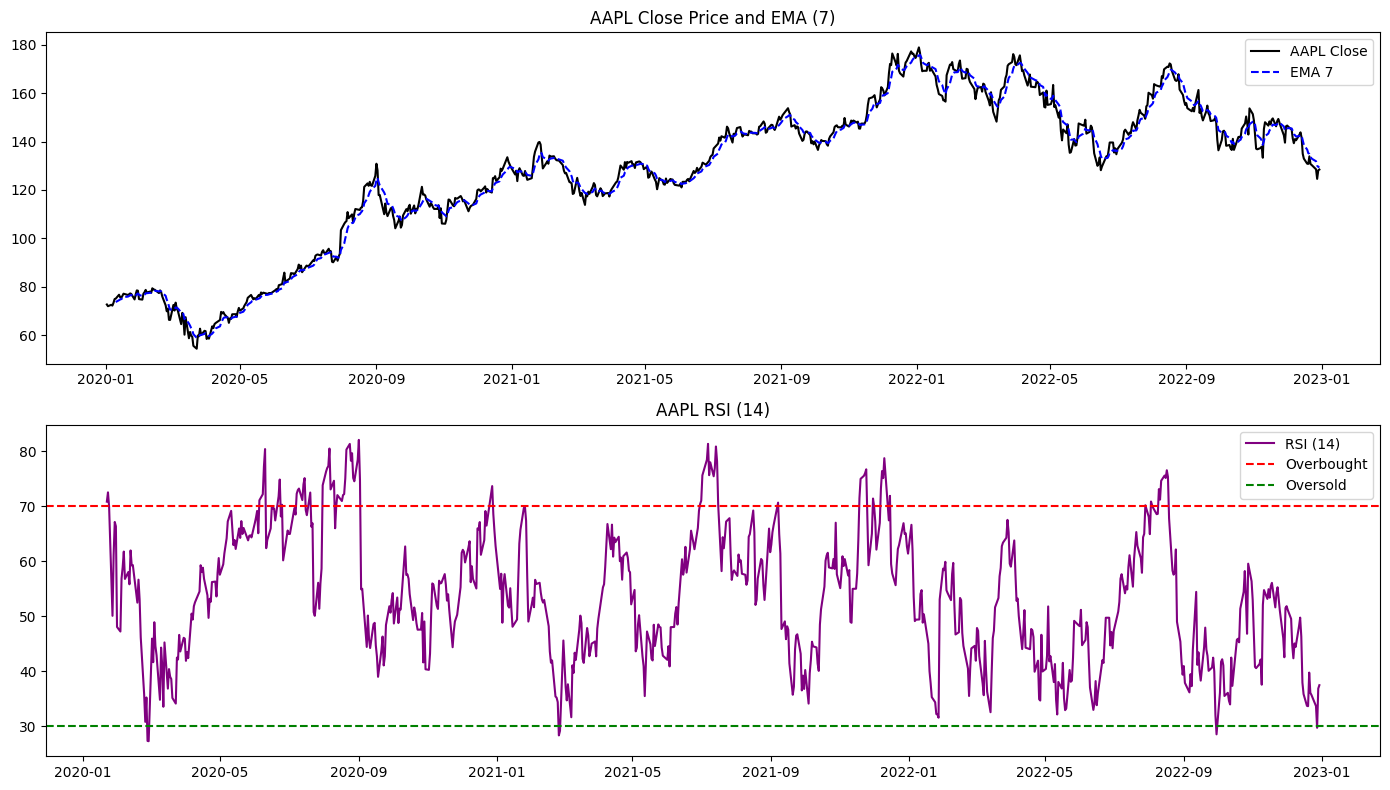

In [164]:
# Plot
plt.figure(figsize=(14, 8)) # Creates a figure that’s 14 inches wide and 8 inches tall.

# Plot Close and EMA
plt.subplot(2, 1, 1)    # Splits the figure into 2 rows, 1 column, and activates plot #1 (top).
plt.plot(close.index, close, label='AAPL Close', color='black')
plt.plot(close.index, ema, label='EMA 7', color='blue', linestyle='--')
plt.title('AAPL Close Price and EMA (7)')
plt.legend()

# Plot RSI
plt.subplot(2, 1, 2)
plt.plot(close.index, rsi, label='RSI (14)', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title('AAPL RSI (14)')
plt.legend()

plt.tight_layout()
plt.show()